## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features X: p variáveis independentes, sendo uma matriz de dimensão nxp;
* Variável Target/Dependente representada por y (float);
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#pip install -U scikit-learn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

In [1]:
nome_arq = 'Dados airbnb - IA.xls'

In [4]:
df

,ID,ID da hospedagem,Nome da hospedagem,ID do Hospede,Nome do Hospede,Grupo de vizinhança,latitude,longitude,Tipo de hospedagem,Preço,locação mínima,Número de avaliações,Taxa mesal de ocupação,Número máximo de hóspedes,Disponibilidade anual
0,1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,4064749.0,-7397237,Quarto Privativo,125,1,9,0.21,6,365
1,2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,4075362.0,-7398377,Ap/Casa inteira,79,1,45,0.38,2,355
2,6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,4074767.0,-73975,Ap/Casa inteira,60,3,74,0.59,1,129


In [5]:
df.shape

(211, 15)

In [7]:
# teste de correlação data e target
df_quant = df.iloc[:,9:]
df_quant.columns

Index(['Preço', 'locação mínima', 'Número de avaliações',
       'Taxa mesal de ocupação', 'Número máximo de hóspedes',
       'Disponibilidade anual'],
      dtype='object')

In [68]:
df_data = df.iloc[:,9:]
df_data.columns

Index(['Preço', 'locação mínima', 'Número de avaliações',
       'Taxa mesal de ocupação', 'Número máximo de hóspedes',
       'Disponibilidade anual'],
      dtype='object')

In [69]:
df_data.drop(columns='Taxa mesal de ocupação', inplace=True)

In [70]:
# target
y = df.iloc[:,12]
y.name

'Taxa mesal de ocupação'

___
# **Análise de Correlação**
* É sempre uma boa ideia eliminar colunas altamente correlacionadas do dataframe, pois colunas altamente correlacionadas fornecem a mesma informação.

Fonte: [Better Heatmaps and Correlation Matrix Plots in Python](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

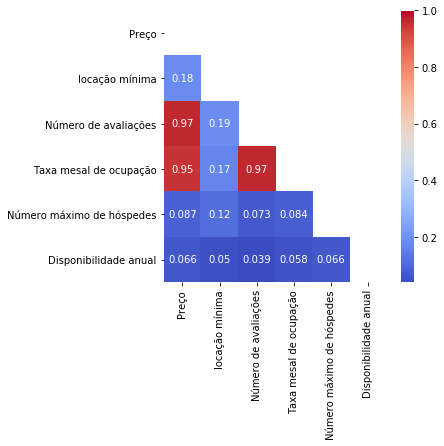

In [11]:
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [59]:
Matrix_Corr = df_data.corr()
Matrix_Corr

,Preço,locação mínima,Número de avaliações,Número máximo de hóspedes,Disponibilidade anual
Preço,1.000000,0.184835,-0.967792,0.086738,0.065883
locação mínima,0.184835,1.000000,-0.188091,-0.116842,-0.049531
Número de avaliações,-0.967792,-0.188091,1.000000,-0.072925,-0.039500
Número máximo de hóspedes,0.086738,-0.116842,-0.072925,1.000000,-0.066228
Disponibilidade anual,0.065883,-0.049531,-0.039500,-0.066228,1.000000


In [60]:
set_Colunas_Correlacionadas = set()
for i in range(len(Matrix_Corr.columns)):
    for j in range(i):
        if abs(Matrix_Corr.iloc[i, j]) > 0.8:
            colname = Matrix_Corr.columns[i]
            set_Colunas_Correlacionadas.add(colname)
set_Colunas_Correlacionadas

{'Número de avaliações'}

In [71]:
X = df_data.values
y = y.values

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

In [16]:
y_train

array([52, 50, 72, 48, 60, 43, 62, 58], dtype=int64)

<img src= 'Architecture.png'>

## Parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão);

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$f;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>

# Limitações do OLS:
* Impactado por Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

In [1]:
# Multicolinearidade
#<http://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Ce423_Aula7_Multicolinearidade.pdf>
#<https://edisciplinas.usp.br/pluginfile.php/2340848/mod_resource/content/0/Mayara_Multicolinearidade.pdf>
#<https://www.ime.usp.br/~yambar/MI404-Metodos%20Estatisticos/Aula%208-9%20Regress%E3o%20mult%20dim/inete%20adicional%20-%20multicolinearidade%20em%20modelos%20de%20regressao.pdf>

In [13]:
# instanciar
lr = LinearRegression()
#lr.fit(X_train, y_train)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
F, p_value = feature_selection.f_regression(X, y)

In [39]:
print(f'Intercepto: {lr.intercept_}')

Intercepto: 2.2637914344045704


In [19]:
d_df = {'coef':lr.coef_, 'F': F, 'p_value': p_value}
dfr = pd.DataFrame(d_df)
dfr.loc[dfr.p_value < 0.05, 'significativo'] = True
dfr

,coef,F,p_value,significativo
0,-0.002341,2142.136597,8.281567e-112,True
1,0.000226,6.167780,1.379622e-02,True
2,0.006787,3226.186423,5.050380e-129,True
3,-0.000560,1.475166,2.259029e-01,NaN
4,-0.000026,0.702974,4.027440e-01,NaN


In [36]:
print(f'Score: {lr.score(X,y)}')

Score: 0.9435224717230024


In [83]:
x_scatter = df_data.iloc[:,2]
x_scatter.name

'Número de avaliações'

### Se p_value < 0.05 ==> variável significativa/relevante para o modelo
### F significativo

In [24]:
df_data.columns

Index(['Preço', 'locação mínima', 'Número de avaliações',
       'Número máximo de hóspedes', 'Disponibilidade anual'],
      dtype='object')

In [89]:
df_data = df[['Preço','Número de avaliações']]
df_data.columns

Index(['Preço', 'Número de avaliações'], dtype='object')

___
# **SelectFromModel**

In [21]:
Modelo = LinearRegression()
sfm = feature_selection.SelectFromModel(Modelo, threshold= 0.25)

In [22]:
# Dataframe com as colunas mais relevantes
sfm.fit_transform(X, y).shape

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


(211, 0)

In [81]:
# selecionando pelo p_value e F
y = df.iloc[:,12]
X = df_data.values

In [72]:
lr = LinearRegression()
#lr.fit(X_train, y_train)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
F, p_value = feature_selection.f_regression(X, y)

In [74]:
print(f'Intercepto: {lr.intercept_}')

Intercepto: 0.35007795831766836


In [75]:
d_df = {'coef':lr.coef_, 'F': F, 'p_value': p_value}
pd.DataFrame(d_df)

,coef,F,p_value
0,-0.002341,2142.136597,8.281567e-112
1,0.000226,6.167780,1.379622e-02
2,0.006787,3226.186423,5.050380e-129
3,-0.000560,1.475166,2.259029e-01
4,-0.000026,0.702974,4.027440e-01


In [76]:
print(f'Score: {lr.score(X,y)}')

Score: 0.9439177530163411


In [29]:
# Predição
lr.predict(np.array([[9, 115]]))

array([1.10455276])

In [80]:
# valores preditos de y
y_pred = lr.predict(X)

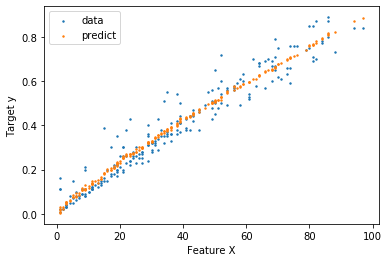

In [84]:
plt.scatter(x_scatter, y, s=2, label= 'data')
plt.scatter(x_scatter, y_pred, s=2, label= 'predict')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()

In [91]:
df_data.head()

,Preço,Número de avaliações
0,125,9
1,79,45
2,60,74
3,80,39
4,60,71


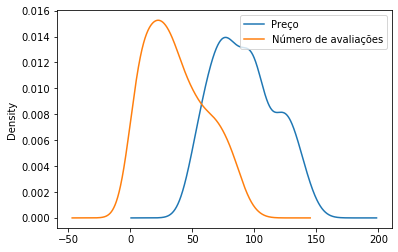

In [92]:
df_data.plot.kde()

In [95]:
df_data.columns

Index(['Preço', 'Número de avaliações'], dtype='object')

## Transformações

In [93]:
from sklearn.preprocessing import normalize

In [96]:
dft = normalize(df_data, norm= 'l2')
dft = pd.DataFrame(dft, columns=['Preço', 'Número de avaliações'])
dft.head()

,Preço,Número de avaliações
0,0.997418,0.071814
1,0.868919,0.494954
2,0.629802,0.776756
3,0.898876,0.438202
4,0.645460,0.763794


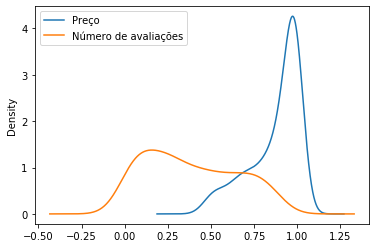

In [97]:
dft.plot.kde()

## StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* If data is not normally distributed, this is not the best scaler to use.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">

In [98]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

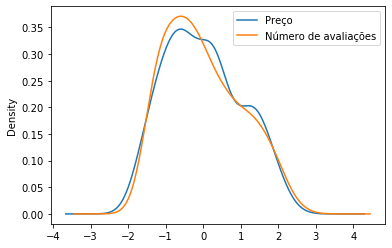

In [101]:
dft = standardscaler.fit_transform(df_data)
dft = pd.DataFrame(dft, columns=['Preço', 'Número de avaliações'])
dft.plot.kde()

In [102]:
X = dft.values
#lr.fit(X_train, y_train)
lr.fit(X, y)
lr.score(X,y)

0.9435224717230024

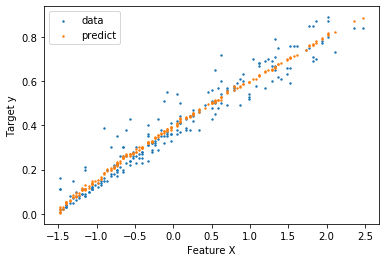

In [104]:
xrot = 'Número de avaliações'
plt.scatter(dft[xrot], y, s=2, label= 'data')
plt.scatter(dft[xrot], y_pred, s=2, label= 'predict')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()